In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00038.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_01005.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00045.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00005.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00055.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00053.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00008.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_00995.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_01019.jpg
/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask/real_

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img

2024-05-06 09:19:23.939028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 09:19:23.939165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 09:19:24.091755: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
train_mask = os.listdir('/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask')
print(train_mask[0:5])
print(train_mask[-5:])

['0733.jpg', '0125.jpeg', '0498.jpg', '1383.jpg', '1626.jpg']
['0934.png', '0200.jpg', '1135.jpg', '1515.jpg', '0269.jpg']


In [8]:
train_nomask = os.listdir('/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask')
print(train_nomask[0:5])
print(train_nomask[-5:])

['208.jpg', '45.jpg', '56.jpg', '89.jpg', '20.jpg']
['218.jpg', '249.jpg', '213.jpg', '136.jpg', '90.jpg']


In [32]:
valid_mask = os.listdir('/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Mask')
valid_nomask = os.listdir('/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation/Non Mask')

In [34]:
len(valid_mask)

153

In [35]:
len(valid_nomask)

153

In [11]:
def plot_images_from_directory(mask_dir_path, class_mask, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(mask_dir_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(mask_dir_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_mask}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

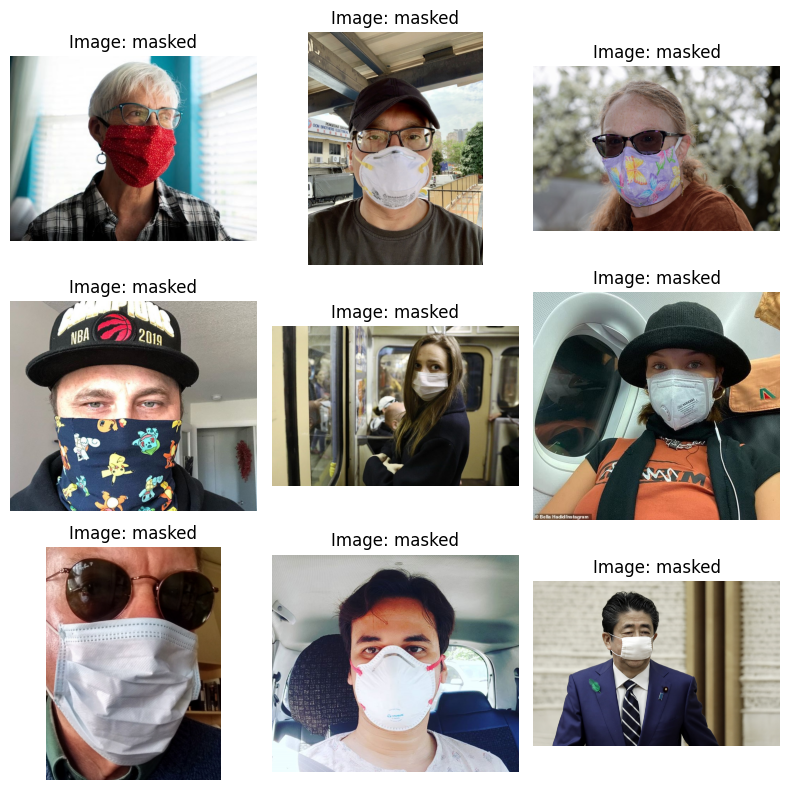

In [15]:
mask_dir_path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Mask'
plot_images_from_directory(mask_dir_path,class_mask='masked')

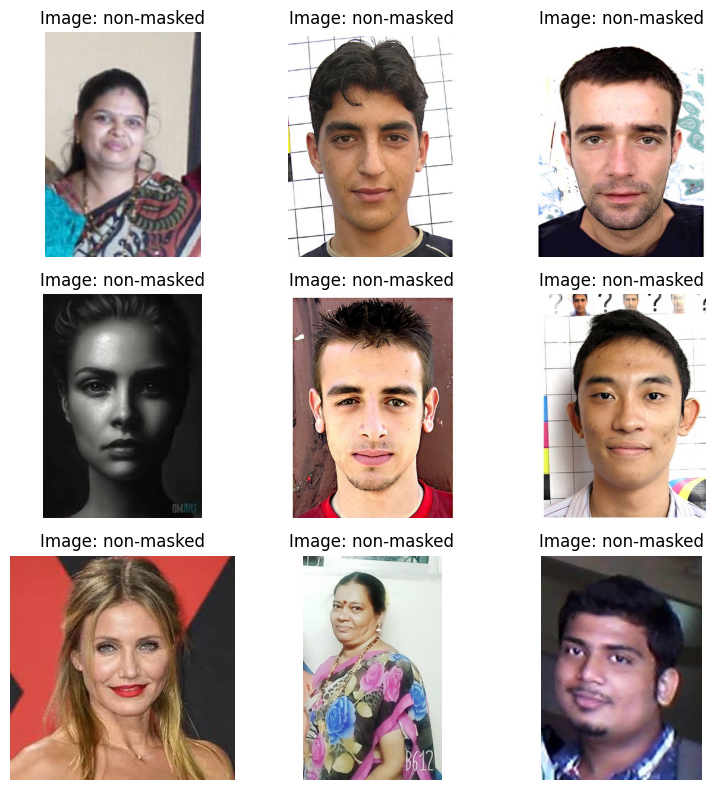

In [16]:
nomask_dir_path = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train/Non Mask'
plot_images_from_directory(nomask_dir_path,class_mask='non-masked')

In [17]:
mask_images = os.listdir(mask_dir_path)
nomask_images = os.listdir(nomask_dir_path)

classes_mask = ['Masked', 'Non-masked']
count = [len(mask_images), len(nomask_images)]

print(count)

[300, 300]


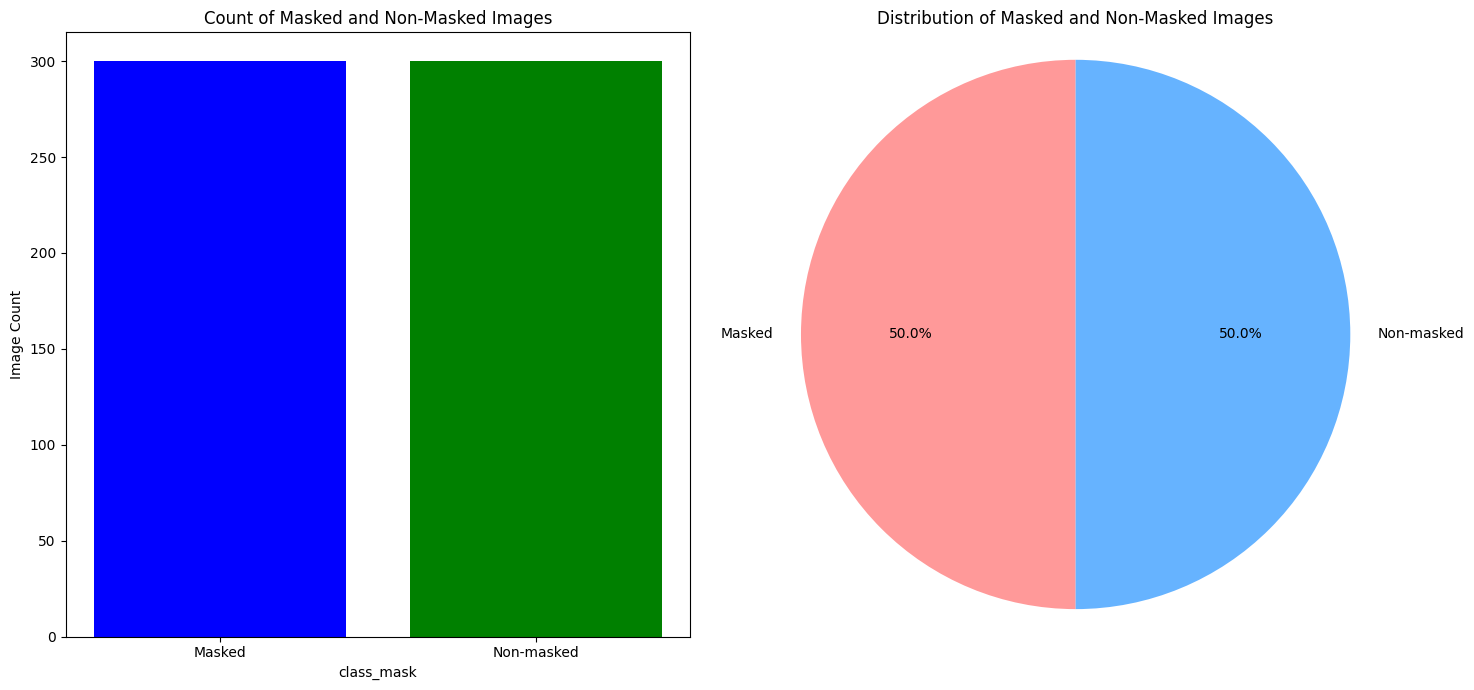

In [20]:
# Creating both a bar chart and a pie chart side by side in a single figure

# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_mask, count, color=['blue', 'green'])
ax[0].set_xlabel('class_mask')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Masked and Non-Masked Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_mask, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Masked and Non-Masked Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()


In [26]:
base_dir = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Train'
base_dir1 = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Validation'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = validation_datagen.flow_from_directory(
    base_dir1,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')#,
    #subset='validation')  # Set as validation data

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [36]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'Mask': 0, 'Non Mask': 1}
Validation class labels: {'Mask': 0, 'Non Mask': 1}


In [37]:
images, labels = next(train_generator)
images, labels

(array([[[[0.09019608, 0.09803922, 0.07843138],
          [0.09411766, 0.10196079, 0.08235294],
          [0.09411766, 0.10196079, 0.08235294],
          ...,
          [0.12941177, 0.13333334, 0.10196079],
          [0.1254902 , 0.12941177, 0.09803922],
          [0.12941177, 0.13333334, 0.1137255 ]],
 
         [[0.09411766, 0.10196079, 0.08235294],
          [0.09411766, 0.10196079, 0.08235294],
          [0.09803922, 0.10588236, 0.08627451],
          ...,
          [0.12941177, 0.13333334, 0.10196079],
          [0.12941177, 0.13333334, 0.10196079],
          [0.10980393, 0.1137255 , 0.09411766]],
 
         [[0.09411766, 0.10196079, 0.08235294],
          [0.09803922, 0.10588236, 0.08627451],
          [0.09803922, 0.10588236, 0.08627451],
          ...,
          [0.13333334, 0.13725491, 0.10588236],
          [0.12941177, 0.13333334, 0.10196079],
          [0.11764707, 0.12156864, 0.09803922]],
 
         ...,
 
         [[0.0627451 , 0.07058824, 0.06666667],
          [0.06274

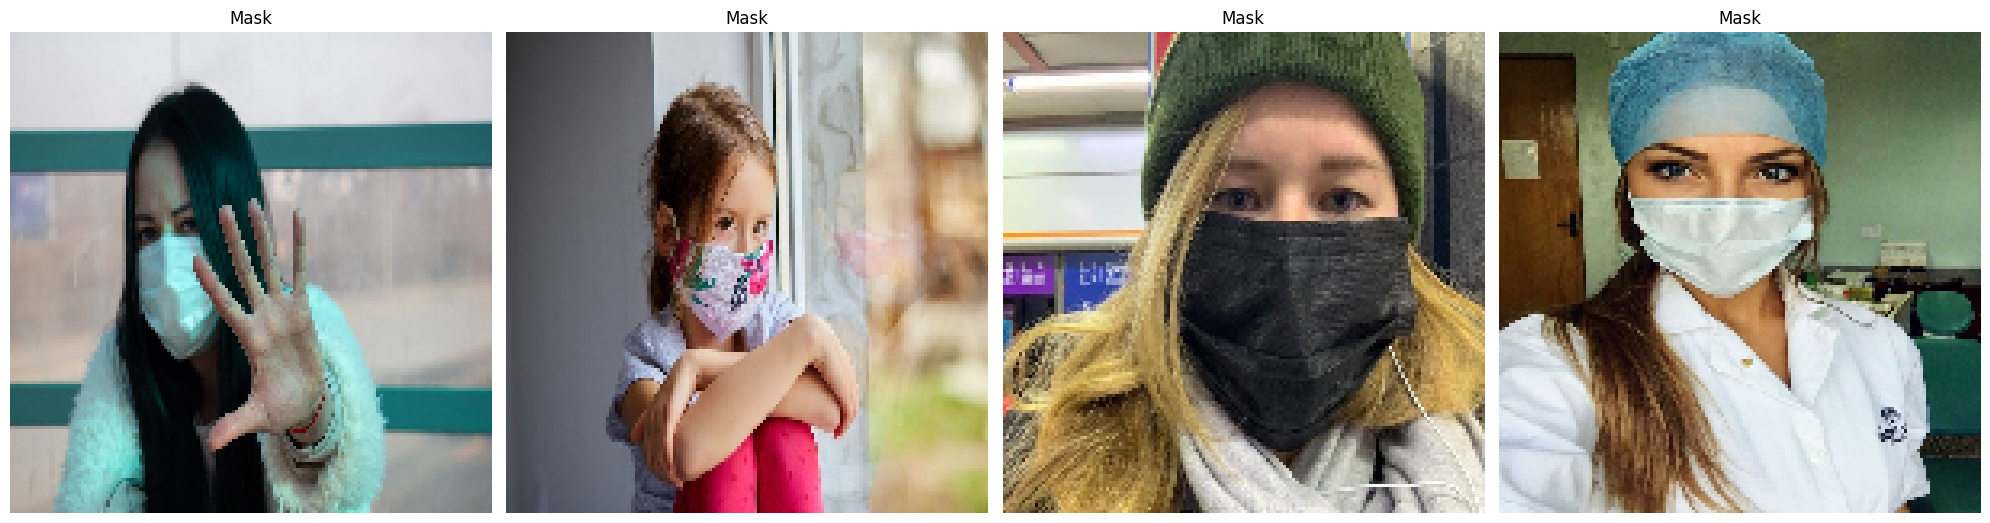

In [39]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [40]:
train_generator.reset()

In [41]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

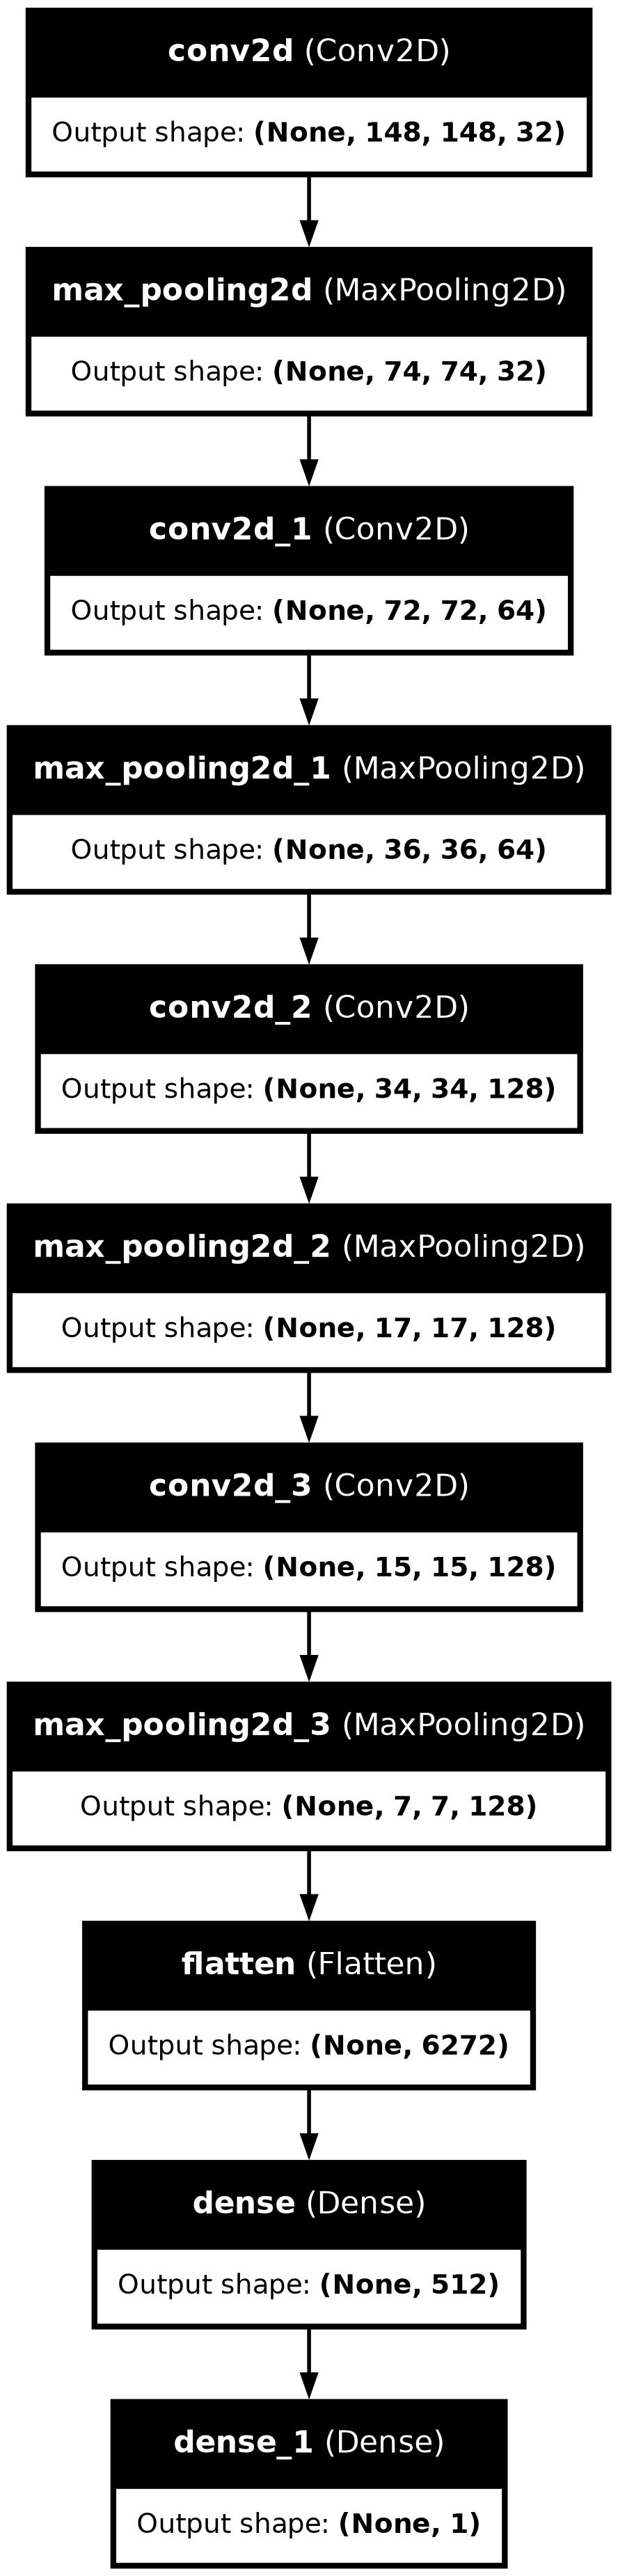

In [45]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

30.0 16.0


In [48]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.7027 - loss: 0.5426 - val_accuracy: 0.8725 - val_loss: 0.3779
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7964 - loss: 0.4360 - val_accuracy: 0.7451 - val_loss: 0.4542
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.8582 - loss: 0.3414 - val_accuracy: 0.8268 - val_loss: 0.4534
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.8985 - loss: 0.2740 - val_accuracy: 0.8922 - val_loss: 0.2590
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.9297 - loss: 0.1976 - val_accuracy: 0.9085 - val_loss: 0.2525
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9241 - loss: 0.1870 - val_accuracy: 0.8333 - val_loss: 0.3894
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - accuracy: 0.9398 - loss: 0.1535 - val_accuracy: 0.8987 - val_loss: 0.2373
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.9338 - loss: 0.1788 - 

In [49]:
history.history

{'accuracy': [0.7066666483879089,
  0.7950000166893005,
  0.8566666841506958,
  0.8983333110809326,
  0.9300000071525574,
  0.9233333468437195,
  0.9399999976158142,
  0.9333333373069763,
  0.9383333325386047,
  0.9566666483879089],
 'loss': [0.538402259349823,
  0.43853816390037537,
  0.3438054919242859,
  0.2736610472202301,
  0.19726280868053436,
  0.18852481245994568,
  0.1533062607049942,
  0.17991185188293457,
  0.16414907574653625,
  0.11581787467002869],
 'val_accuracy': [0.8725489974021912,
  0.7450980544090271,
  0.826797366142273,
  0.8921568393707275,
  0.9084967374801636,
  0.8333333134651184,
  0.898692786693573,
  0.9084967374801636,
  0.8104575276374817,
  0.9117646813392639],
 'val_loss': [0.3779427707195282,
  0.4542069137096405,
  0.4533826410770416,
  0.25899702310562134,
  0.2525043785572052,
  0.3894107937812805,
  0.23730157315731049,
  0.24422673881053925,
  0.4078878164291382,
  0.2705121636390686]}

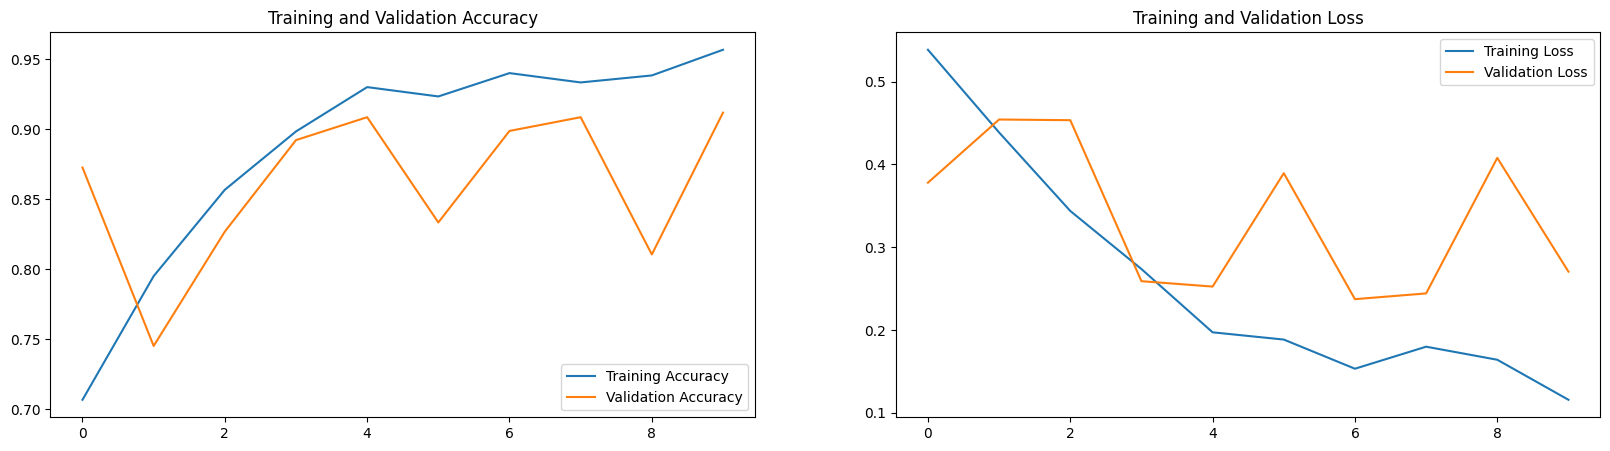

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#   **Model Evaluation**

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/kaggle/input/covid-face-mask-detection-dataset/New Masks Dataset/Test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 100 images belonging to 2 classes.


In [57]:
int(np.ceil(test_generator.samples/test_generator.batch_size))

5

In [58]:
probabilities = model.predict(test_generator,
                              steps=int(np.ceil(test_generator.samples/test_generator.batch_size)))
probabilities

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 462ms/step


array([[4.0500405e-01],
       [2.3336220e-01],
       [1.6406918e-02],
       [5.0190254e-03],
       [2.5312364e-01],
       [2.3373377e-02],
       [2.7982229e-01],
       [1.5426256e-02],
       [2.2489446e-01],
       [1.2792613e-01],
       [2.7156922e-01],
       [1.1628508e-01],
       [1.2649727e-01],
       [8.3764248e-02],
       [6.7970455e-02],
       [2.7844354e-03],
       [2.6270678e-02],
       [1.1448725e-02],
       [1.0040035e-02],
       [2.1600021e-02],
       [1.6947126e-02],
       [3.2141845e-04],
       [2.0064193e-01],
       [2.2055162e-02],
       [1.5460686e-02],
       [3.4536786e-02],
       [4.0093729e-01],
       [1.5190332e-01],
       [8.1002039e-01],
       [6.5583624e-03],
       [3.4821436e-02],
       [1.4264521e-01],
       [1.2224514e-02],
       [5.0102863e-03],
       [4.6588036e-01],
       [1.3081317e-01],
       [3.1231996e-01],
       [1.9010781e-01],
       [7.2630006e-01],
       [5.9263468e-02],
       [9.9314086e-02],
       [7.106769

In [59]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=int(np.ceil(test_generator.samples/test_generator.batch_size)))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

# Plotting Confusion Matrix

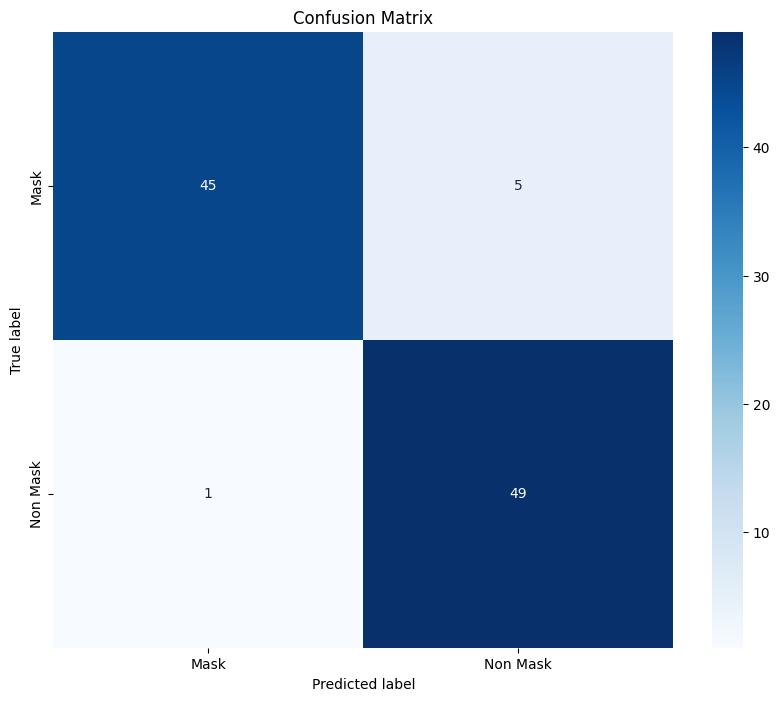

In [60]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [61]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 345ms/step - accuracy: 0.9474 - loss: 0.1801
Test accuracy: 94.00%
Test loss: 0.16


# Misclassifications

In [62]:
# Reset the test_generator before making predictions
test_generator.reset()

# Predict the whole test set
predictions = model.predict(test_generator, verbose=1)

# The predictions will be in the format of probabilities. You'll need to convert these to binary labels (0 or 1) based on a 0.5 threshold.
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassified_indices)
print(f"Total misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step
Total misclassifications in the test set: 6 out of 100


# Visualising Misclassifications

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step
Total misclassifications: 6


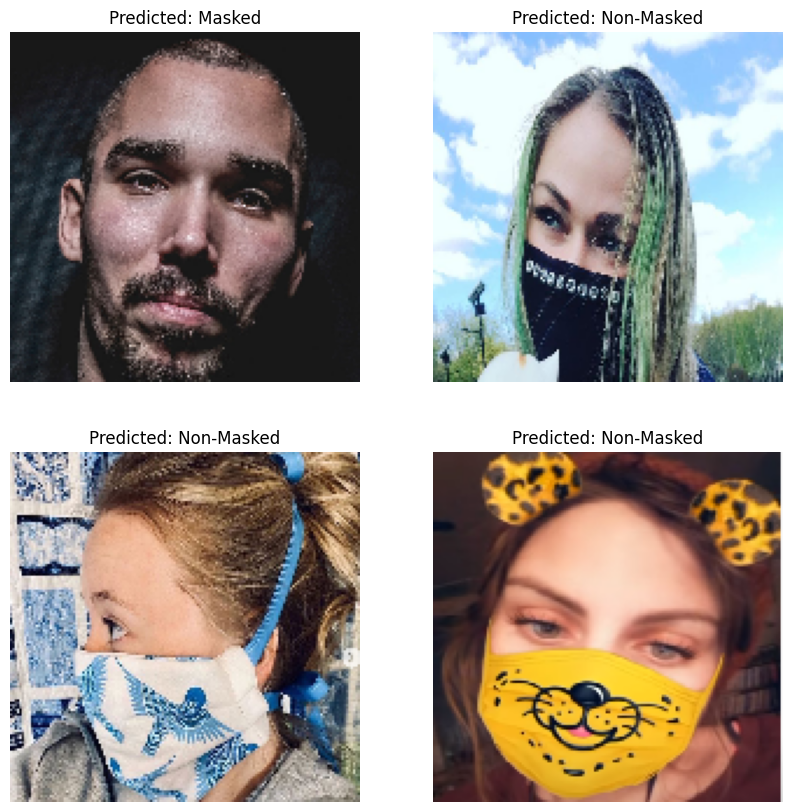

In [65]:
# Generate predictions for all test images
predictions = model.predict(test_generator)
# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames
# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassified_indices)}")


# Select a random subset of misclassified images
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Non-Masked" if predicted_classes[index] else "Masked"

    # Display
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
plt.show()